In [1]:
%matplotlib inline
import re
import numpy as np
import matplotlib
#matplotlib.use("Agg")
import matplotlib.pyplot as plt
#import csv
import os.path
import datetime
from cycler import cycler
import pandas as pd
import matplotlib.ticker as ticker


In [117]:
filename = "Tensorflow-HP/nvidia-smi-tfhp.csv"
print "Reading",filename

smi_data = pd.read_csv(filename)

Reading Tensorflow-HP/nvidia-smi-tfhp.csv


In [118]:
smi_data.iloc[:2]

,timestamp,name,memory.total [MiB],memory.used [MiB],utilization.gpu [%],utilization.memory [%],clocks.current.sm [MHz],clocks.current.memory [MHz]
0,2017/12/19 06:46:59.102,Tesla M60,7613 MiB,0 MiB,97 %,9 %,974 MHz,2505 MHz
1,2017/12/19 06:46:59.202,Tesla M60,7613 MiB,0 MiB,87 %,9 %,1075 MHz,2505 MHz


In [131]:
smi_data.index = pd.to_datetime(smi_data['timestamp'])#, format = "%Y/%m/%d %H:%M:%S.%f")
smi_tfhp = smi_data

In [132]:
smi_hpcg = pd.read_csv("HPCG/nvidia-smi-hpcg.csv")
smi_hpcg.index = pd.to_datetime(smi_hpcg['timestamp'])
smi_hpcg.iloc[:3]

,timestamp,name,memory.total [MiB],memory.used [MiB],utilization.gpu [%],utilization.memory [%],clocks.current.sm [MHz],clocks.current.memory [MHz]
timestamp,,,,,,,,
2017-12-19 06:58:06.447,2017/12/19 06:58:06.447,Tesla M60,7613 MiB,0 MiB,68 %,4 %,632 MHz,2505 MHz
2017-12-19 06:58:06.699,2017/12/19 06:58:06.699,Tesla M60,7613 MiB,0 MiB,94 %,7 %,784 MHz,2505 MHz
2017-12-19 06:58:06.850,2017/12/19 06:58:06.850,Tesla M60,7613 MiB,0 MiB,94 %,7 %,784 MHz,2505 MHz


In [75]:
start = smi_data.index[0]
smi_data["delta"] = smi_data.index - start
smi_data.iloc[:2]

,timestamp,name,memory.total [MiB],memory.used [MiB],utilization.gpu [%],utilization.memory [%],clocks.current.sm [MHz],clocks.current.memory [MHz],delta
timestamp,,,,,,,,,
2017-12-19 06:46:59.102,2017/12/19 06:46:59.102,Tesla M60,7613 MiB,0 MiB,97 %,9 %,974 MHz,2505 MHz,00:00:00
2017-12-19 06:46:59.202,2017/12/19 06:46:59.202,Tesla M60,7613 MiB,0 MiB,87 %,9 %,1075 MHz,2505 MHz,00:00:00.100000


In [76]:
smi_data = smi_data.set_index(smi_data['delta'])
smi_data.iloc[:3]

,timestamp,name,memory.total [MiB],memory.used [MiB],utilization.gpu [%],utilization.memory [%],clocks.current.sm [MHz],clocks.current.memory [MHz],delta
delta,,,,,,,,,
00:00:00,2017/12/19 06:46:59.102,Tesla M60,7613 MiB,0 MiB,97 %,9 %,974 MHz,2505 MHz,00:00:00
00:00:00.100000,2017/12/19 06:46:59.202,Tesla M60,7613 MiB,0 MiB,87 %,9 %,1075 MHz,2505 MHz,00:00:00.100000
00:00:00.200000,2017/12/19 06:46:59.302,Tesla M60,7613 MiB,0 MiB,0 %,0 %,1075 MHz,2505 MHz,00:00:00.200000


In [77]:
print smi_data.columns
smi_data = smi_data.drop(columns = ['timestamp', ' name', 'delta'])
smi_data.iloc[:3]

Index([u'timestamp', u' name', u' memory.total [MiB]', u' memory.used [MiB]',
       u' utilization.gpu [%]', u' utilization.memory [%]',
       u' clocks.current.sm [MHz]', u' clocks.current.memory [MHz]', u'delta'],
      dtype='object')


,memory.total [MiB],memory.used [MiB],utilization.gpu [%],utilization.memory [%],clocks.current.sm [MHz],clocks.current.memory [MHz]
delta,,,,,,
00:00:00,7613 MiB,0 MiB,97 %,9 %,974 MHz,2505 MHz
00:00:00.100000,7613 MiB,0 MiB,87 %,9 %,1075 MHz,2505 MHz
00:00:00.200000,7613 MiB,0 MiB,0 %,0 %,1075 MHz,2505 MHz


In [78]:
pat = re.compile("[0-9\.]+")
# Extract float number from a string
def parseFloat(str):
    global pat
    f = pat.search(str)
    if f is not None:
        d = float(f.group())
        return d
    return None

In [79]:
smi_data.iloc[:3]

,memory.total [MiB],memory.used [MiB],utilization.gpu [%],utilization.memory [%],clocks.current.sm [MHz],clocks.current.memory [MHz]
delta,,,,,,
00:00:00,7613 MiB,0 MiB,97 %,9 %,974 MHz,2505 MHz
00:00:00.100000,7613 MiB,0 MiB,87 %,9 %,1075 MHz,2505 MHz
00:00:00.200000,7613 MiB,0 MiB,0 %,0 %,1075 MHz,2505 MHz


In [80]:
smi_data = smi_data.applymap(parseFloat)
smi_data.iloc[:3]

,memory.total [MiB],memory.used [MiB],utilization.gpu [%],utilization.memory [%],clocks.current.sm [MHz],clocks.current.memory [MHz]
delta,,,,,,
00:00:00,7613.0,0.0,97.0,9.0,974.0,2505.0
00:00:00.100000,7613.0,0.0,87.0,9.0,1075.0,2505.0
00:00:00.200000,7613.0,0.0,0.0,0.0,1075.0,2505.0


In [81]:
smi_MB = smi_data.filter(regex=(".*\[MiB.*"))
smi_pr = smi_data.filter(regex=(".*\[\%.*"))
smi_Hz = smi_data.filter(regex=(".*\[MHz.*"))
smi_pr.iloc[500:503]

,utilization.gpu [%],utilization.memory [%]
delta,,
00:00:50.152000,100.0,85.0
00:00:50.252000,100.0,85.0
00:00:50.353000,99.0,89.0


In [88]:
smi_pr.index[0]

Timedelta('0 days 00:00:00')

In [89]:
smi_pr.index[-1]

Timedelta('0 days 00:01:21.995000')

In [84]:
import matplotlib.dates as dates

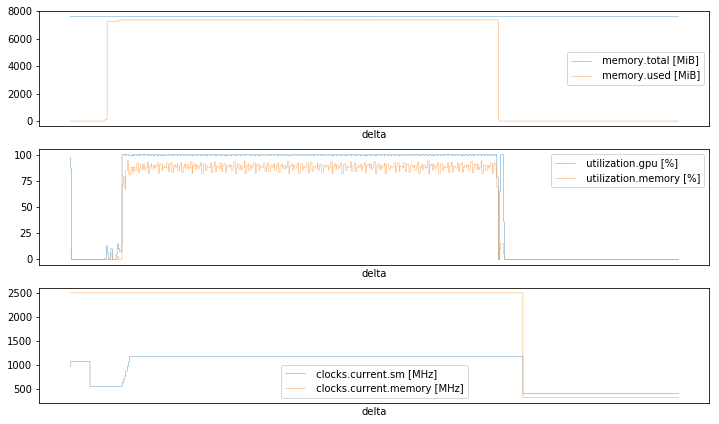

In [94]:
plt.rcParams['figure.figsize'] = 12,8
fig, axarr = plt.subplots(3)
smi_MB.plot(drawstyle="steps-post",linewidth=0.5,alpha=0.7,ax = axarr[0])
smi_pr.plot(drawstyle="steps-post",linewidth=0.5,alpha=0.7,ax = axarr[1])
smi_Hz.plot(drawstyle="steps-post",linewidth=0.5,alpha=0.7,ax = axarr[2])
for axis in axarr:
    axis.legend()
    axis.xaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
    #axis.xaxis.set_major_locator(plt.MaxNLocator(24))
    axis.xaxis.set_major_locator(dates.SecondLocator(bysecond = range(120), interval = 10))
    #axis.xaxis.set_minor_locator(dates.MicrosecondLocator(interval = 1000))
    #axis.xaxis.set_major_formatter(dates.DateFormatter('%S:%f'))
plt.show()

In [95]:
dates.SecondLocator(bysecond = range(120), interval = 10)

In [100]:
# Parse date from readable format to seconds
def parseTime(date_time):
    global start
    dt_obj = datetime.datetime.strptime(date_time, "%Y/%m/%d %H:%M:%S.%f")
    seconds = 0
    if start == 0:
        start = dt_obj
    else:
        seconds = (dt_obj - start).total_seconds()
    return seconds

In [120]:
smi_tfhp.iloc[:3]

,timestamp,name,memory.total [MiB],memory.used [MiB],utilization.gpu [%],utilization.memory [%],clocks.current.sm [MHz],clocks.current.memory [MHz]
timestamp,,,,,,,,
2017-12-19 06:46:59.102,2017/12/19 06:46:59.102,Tesla M60,7613 MiB,0 MiB,97 %,9 %,974 MHz,2505 MHz
2017-12-19 06:46:59.202,2017/12/19 06:46:59.202,Tesla M60,7613 MiB,0 MiB,87 %,9 %,1075 MHz,2505 MHz
2017-12-19 06:46:59.302,2017/12/19 06:46:59.302,Tesla M60,7613 MiB,0 MiB,0 %,0 %,1075 MHz,2505 MHz


In [121]:
smi_tfhp["sec"] = smi_tfhp["timestamp"].apply(parseTime)

In [123]:
smi_tfhp.iloc[15:20]

,timestamp,name,memory.total [MiB],memory.used [MiB],utilization.gpu [%],utilization.memory [%],clocks.current.sm [MHz],clocks.current.memory [MHz],sec
timestamp,,,,,,,,,
2017-12-19 06:47:00.608,2017/12/19 06:47:00.608,Tesla M60,7613 MiB,0 MiB,0 %,0 %,1075 MHz,2505 MHz,1.506
2017-12-19 06:47:00.708,2017/12/19 06:47:00.708,Tesla M60,7613 MiB,0 MiB,0 %,0 %,1075 MHz,2505 MHz,1.606
2017-12-19 06:47:00.809,2017/12/19 06:47:00.809,Tesla M60,7613 MiB,0 MiB,0 %,0 %,1075 MHz,2505 MHz,1.707
2017-12-19 06:47:00.909,2017/12/19 06:47:00.909,Tesla M60,7613 MiB,0 MiB,0 %,0 %,1075 MHz,2505 MHz,1.807
2017-12-19 06:47:01.009,2017/12/19 06:47:01.009,Tesla M60,7613 MiB,0 MiB,0 %,0 %,1075 MHz,2505 MHz,1.907


In [125]:
print smi_tfhp.columns
smi_tfhp = smi_tfhp.set_index(["sec"])
smi_tfhp = smi_tfhp.drop(columns = ['timestamp', ' name'])
smi_tfhp.iloc[15:20]

Index([u'timestamp', u' name', u' memory.total [MiB]', u' memory.used [MiB]',
       u' utilization.gpu [%]', u' utilization.memory [%]',
       u' clocks.current.sm [MHz]', u' clocks.current.memory [MHz]', u'sec'],
      dtype='object')


,memory.total [MiB],memory.used [MiB],utilization.gpu [%],utilization.memory [%],clocks.current.sm [MHz],clocks.current.memory [MHz]
sec,,,,,,
1.506,7613 MiB,0 MiB,0 %,0 %,1075 MHz,2505 MHz
1.606,7613 MiB,0 MiB,0 %,0 %,1075 MHz,2505 MHz
1.707,7613 MiB,0 MiB,0 %,0 %,1075 MHz,2505 MHz
1.807,7613 MiB,0 MiB,0 %,0 %,1075 MHz,2505 MHz
1.907,7613 MiB,0 MiB,0 %,0 %,1075 MHz,2505 MHz


In [126]:
smi_tfhp = smi_tfhp.applymap(parseFloat)
smi_tfhp.iloc[:3]

,memory.total [MiB],memory.used [MiB],utilization.gpu [%],utilization.memory [%],clocks.current.sm [MHz],clocks.current.memory [MHz]
sec,,,,,,
0.0,7613.0,0.0,97.0,9.0,974.0,2505.0
0.1,7613.0,0.0,87.0,9.0,1075.0,2505.0
0.2,7613.0,0.0,0.0,0.0,1075.0,2505.0


In [127]:
smi_MB = smi_tfhp.filter(regex=(".*\[MiB.*"))
smi_pr = smi_tfhp.filter(regex=(".*\[\%.*"))
smi_Hz = smi_tfhp.filter(regex=(".*\[MHz.*"))
smi_pr.iloc[500:503]

,utilization.gpu [%],utilization.memory [%]
sec,,
50.152,100.0,85.0
50.252,100.0,85.0
50.353,99.0,89.0


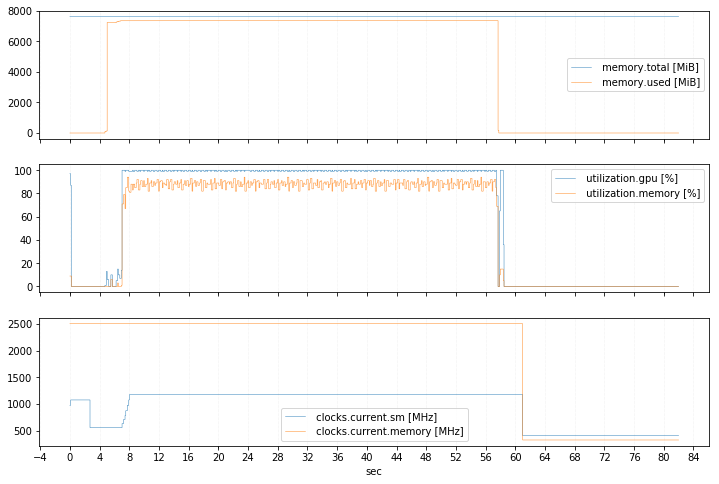

In [130]:
plt.rcParams['figure.figsize'] = 12,8
fig, axarr = plt.subplots(3,sharex = True)
smi_MB.plot(drawstyle="steps-post",linewidth=0.5,alpha=0.9,ax = axarr[0])
smi_pr.plot(drawstyle="steps-post",linewidth=0.5,alpha=0.9,ax = axarr[1])
smi_Hz.plot(drawstyle="steps-post",linewidth=0.5,alpha=0.9,ax = axarr[2])
for axis in axarr:
    axis.legend()
    axis.xaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
    axis.xaxis.set_major_locator(plt.MaxNLocator(24))
    #axis.xaxis.set_major_locator(dates.SecondLocator(bysecond = range(120), interval = 10))
    #axis.xaxis.set_minor_locator(dates.MicrosecondLocator(interval = 1000))
    #axis.xaxis.set_major_formatter(dates.DateFormatter('%S:%f'))
plt.show()